In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
data = pd.concat([pd.read_csv('../data/%d.csv' % year) for year in range(2003,2017)])

In [66]:
data = data[data.Year!=2003]

In [67]:
data.Difficulty_Start.describe()

count    13037647.000000
mean            2.536867
std             1.125554
min             0.987553
25%             1.546205
50%             2.575574
75%             3.362644
max             5.515152
Name: Difficulty_Start, dtype: float64

In [68]:
(data.Difficulty_Start<1).sum()

113668

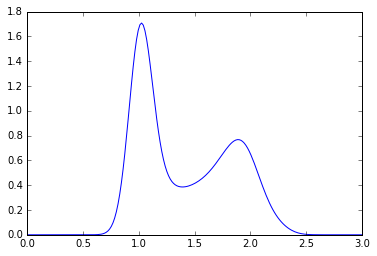

In [12]:
from scipy.stats import gaussian_kde

density = gaussian_kde(data[data.Cat=='Green'].Difficulty_Start.values)
xs = np.linspace(0,3,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

In [14]:
data.head()

,Cat,Shots_taken_from_location,Started_at_Z,Distance_from_hole,Hole,Round,Course_#,Year,Green_to_work_with,Year-Course,Hole-Course,Round-Year-Course,Difficulty
1052894,Tee Box,10,NaN,1383.498403,8,2,660,2004,58.801544,2004-660,8-660,2-2004-660,0
1052895,Tee Box,4,NaN,1367.723048,15,1,500,2004,17.232815,2004-500,15-500,1-2004-500,0
1052896,Tee Box,4,NaN,1606.076119,13,4,538,2004,13.637763,2004-538,13-538,4-2004-538,0
1052897,Tee Box,4,NaN,1345.218848,13,1,500,2004,50.857550,2004-500,13-500,1-2004-500,0
1052898,Tee Box,4,NaN,1217.408893,12,1,500,2004,20.491049,2004-500,12-500,1-2004-500,0


In [14]:
data[(data.Shot!=1) & (data.Cat!='Green')].shape

(4295702, 44)

In [69]:
np.mean((data.Shots_taken_from_location-data.Difficulty_Start)**2)**.5

0.49493527925743885

In [29]:
data.insert(len(data.columns),'Difficulty_Start_broadie',[0]*len(data))

In [30]:
data.loc[data.Shot==data.Hole_Score,'Difficulty_Start_broadie'] = data[data.Shot==data.Hole_Score]['Strokes_Gained/Baseline'] + 1

In [31]:
data=data.sort_values(['Player_#','Course_#','Round','Hole'])
for i in range(1,int(data.Hole_Score.max())+1): ##i is hole_score
    for j in range(i-1,0,-1): ##j is shot
        data.loc[(data.Hole_Score==i) & (data.Shot==j),'Difficulty_Start_broadie'] = \
                                data[(data.Hole_Score==i) & (data.Shot==j+1)].Difficulty_Start_broadie.values +\
                                data[(data.Hole_Score==i) & (data.Shot==j)]['Strokes_Gained/Baseline'].values + 1

In [32]:
data.Difficulty_Start_broadie.describe()

count    13037647.000000
mean            2.552862
std             1.139911
min             0.839000
25%             1.544000
50%             2.567000
75%             3.368000
max            10.000000
Name: Difficulty_Start_broadie, dtype: float64

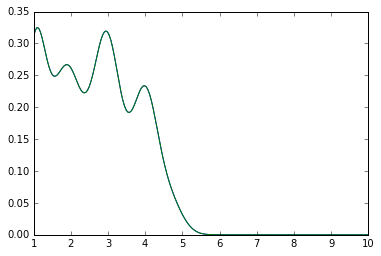

In [39]:
density = gaussian_kde(data.Difficulty_Start.values)
xs = np.linspace(1,10,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))

density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))

In [33]:
np.mean((data.Shots_taken_from_location-data.Difficulty_Start_broadie)**2)**.5

0.4987432440859361

In [34]:
np.mean((data.Shots_taken_from_location-(data.Difficulty_Start_broadie+data.Difficulty_Start)/2)**2)**.5

0.49415420152579304

In [70]:
data.insert(len(data.columns),'New_Difficulty',data.Difficulty_Start)

In [43]:
import pickle
with open('./../PickleFiles/TeeDifficulty.pkl','r') as pickleFile:
    d = pickle.load(pickleFile)

In [71]:
years = [key[0] for key in d.keys()]
courses = [key[1] for key in d.keys()]
holes = [key[2] for key in d.keys()]
round = [key[3] for key in d.keys()]
difficulties = [d[key] for key in d.keys()]
df = pd.DataFrame({'Year':years,'Course_#':courses,'Hole':holes,'Round':round,'Tee_Difficulty':difficulties})

In [72]:
df.shape

(45702, 5)

In [73]:
df.head()

,Course_#,Hole,Round,Tee_Difficulty,Year
0,202,6,2,4.562500,2004
1,205,15,1,2.846154,2014
2,656,11,1,3.294118,2007
3,776,16,4,3.986301,2014
4,4,16,4,3.240506,2011


In [74]:
data = pd.merge(data, df, on=['Course_#','Hole','Round','Year'])

In [75]:
data.loc[data.Shot==1,'New_Difficulty'] = data.loc[data.Shot==1,'Tee_Difficulty']

In [76]:
np.mean((data.Shots_taken_from_location-data.New_Difficulty)**2)**.5

0.4960342137603995

In [77]:
data.New_Difficulty.describe()

count    13037647.000000
mean            2.545726
std             1.137536
min             0.987553
25%             1.546205
50%             2.575574
75%             3.370118
max             5.518519
Name: New_Difficulty, dtype: float64